## What Is Hue?

* Hues are the three primary colors (red, blue, and yellow) and the three secondary colors (orange, green, and violet) that appear in the color wheel or color circle. When you refer to hue, you are referring to pure color, or the visible spectrum of basic colors that can be seen in a rainbow.

## What Is Saturation?
* Color saturation is the purity and intensity of a color as displayed in an image. The higher the saturation of a color, the more vivid and intense it is. The lower a color’s saturation, or chroma, the closer it is to pure gray on the grayscale. 

## What Is Color Value?
* Color value refers to the relative lightness or darkness of a color. We perceive color value based on the quantity of light reflected off of a surface and absorbed by the human eye. We refer to the intensity of the light that reaches the eye as “luminance.”

In [2]:
import helpers
import cv2
import matplotlib.pyplot as plt

In [10]:
image_training = "day_night_images/training/" 
image_test = "day_night_images/test/" 
IMAGE_LIST = helpers.load_dataset(image_training)


In [11]:
def standerdize_output(image):
    return cv2.resize(image,(1100,600))

In [12]:
def encode(label):
    if label == 'night':
        return 0
    return 1

In [13]:
def standerdize(image_list):
    output = []
    for i in image_list:
        image, label = i[0], i[1]
        output.append((standerdize_output(image), encode(label)))
    return output

In [16]:
STANDERDIZED_LIST = standerdize(IMAGE_LIST)

In [21]:
def explore (imageindex):
    test_img, test_label = STANDERDIZED_LIST[imageindex][0], STANDERDIZED_LIST[imageindex][1]
    hsv_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2HSV)
    f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (20,10))
    ax1.imshow(hsv_img)
    ax1.set_title('hsv')
    ax2.imshow(hsv_img[:,:,0],cmap= 'gray')
    ax2.set_title('Hue')    
    ax3.imshow(hsv_img[:,:,1],cmap= 'gray')
    ax3.set_title('Saturation')
    ax4.imshow(hsv_img[:,:,2],cmap= 'gray')
    ax4.set_title('Value')


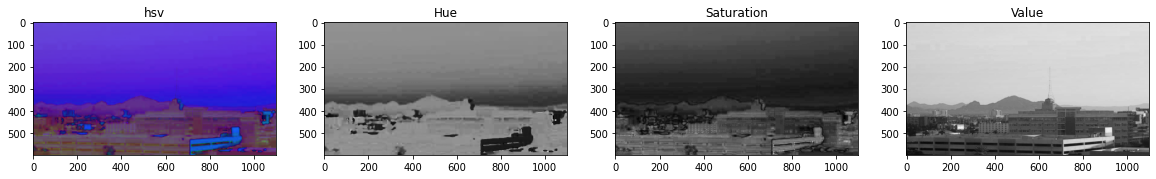

In [22]:
explore(0)

## project implementation 

In [23]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import helpers 

## loading dataset


In [25]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [26]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

## visualizing the dataset

In [27]:
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]
print("SHAPE:",selected_image.shape,"\nLABEL:", selected_label)

SHAPE: (458, 800, 3) 
LABEL: day


## preprocessing the data 

In [28]:
def standerdize_output(image):
    return cv2.resize(image,(1100,600))

In [29]:
def encode(label):
    if label == 'night':
        return 0
    return 1

In [30]:
def standerdize(image_list):
    output = []
    for i in image_list:
        image, label = i[0], i[1]
        output.append((standerdize_output(image), encode(label)))
    return output

In [31]:
STANDERDIZED_LIST = standerdize(IMAGE_LIST)

Text(0.5, 1.0, '0')

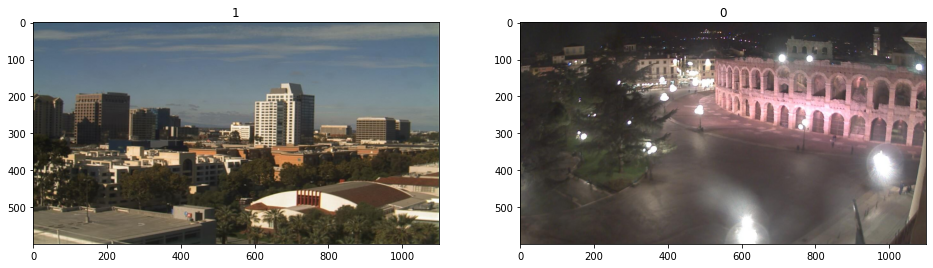

In [32]:
f,(ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.imshow(STANDERDIZED_LIST[15][0])
ax1.set_title((STANDERDIZED_LIST[15][1]))

ax2.imshow(STANDERDIZED_LIST[200][0])
ax2.set_title((STANDERDIZED_LIST[200][1]))

## Feature Extraction

In [33]:
def avg_brightness(image):
    #convert RGB to HSV
    hsv_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    sum_value_channel = np.sum(hsv_image[:,:,2])
    image_area = 1100*600
    return sum_value_channel/image_area

## classification 

In [34]:
def classify(image):
    avg = avg_brightness(image)
    predicted_label = 0
    threshold = 99.0
    if (avg>threshold):
        predicted_label = 1
    return predicted_label

## testing 

In [35]:
import random
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)
STANDERDIZED_TEST_LIST = standerdize(TEST_IMAGE_LIST)
random.shuffle(STANDERDIZED_TEST_LIST)

In [36]:
def misclassified_images(test_images):
    misclass = []
    for i in test_images:
        img,true_label = i[0],i[1] #gound_truth
        predicted_label = classify(img) #my classifier 
        print(f'true_label:{true_label} predicted_label: {predicted_label}')
        if(predicted_label != true_label):
            misclass.append((img,predicted_label))
    return (misclass)

## ACCURACY

In [37]:
total = len(STANDERDIZED_TEST_LIST)
wrong = len( misclassified_images(STANDERDIZED_TEST_LIST))
correct = total - wrong 
print("accuracy = ",correct/total)
print("number of miclassified image = ", wrong)
print("total images",total)

true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 1
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_lab

## Exploring misclassified images 

true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 0
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:1 predicted_label: 1
true_label:0 predicted_label: 1
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_label:0 predicted_label: 0
true_lab

Text(0.5, 1.0, '1')

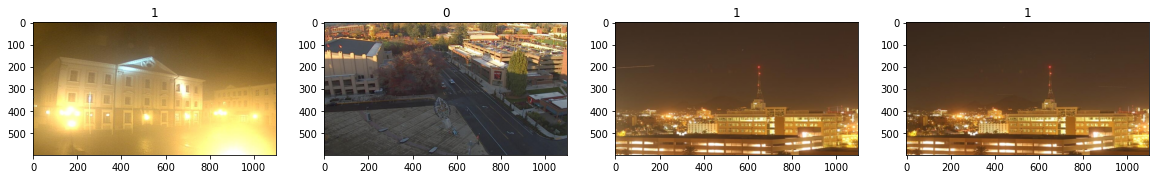

In [40]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,10))
MISCLASSIFIED = misclassified_images(STANDERDIZED_TEST_LIST)
ax1.imshow(MISCLASSIFIED[0][0])
ax1.set_title(MISCLASSIFIED[0][1])

ax2.imshow(MISCLASSIFIED[3][0])
ax2.set_title(MISCLASSIFIED[3][1])

ax3.imshow(MISCLASSIFIED[2][0])
ax3.set_title(MISCLASSIFIED[2][1])

ax4.imshow(MISCLASSIFIED[10][0])
ax4.set_title(MISCLASSIFIED[10][1])

In [41]:
import cv2
from matplotlib import pyplot as plt
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
cv2.data.haarcascades

'c:\\Users\\kcsstore.com\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\cv2\\data\\'

135


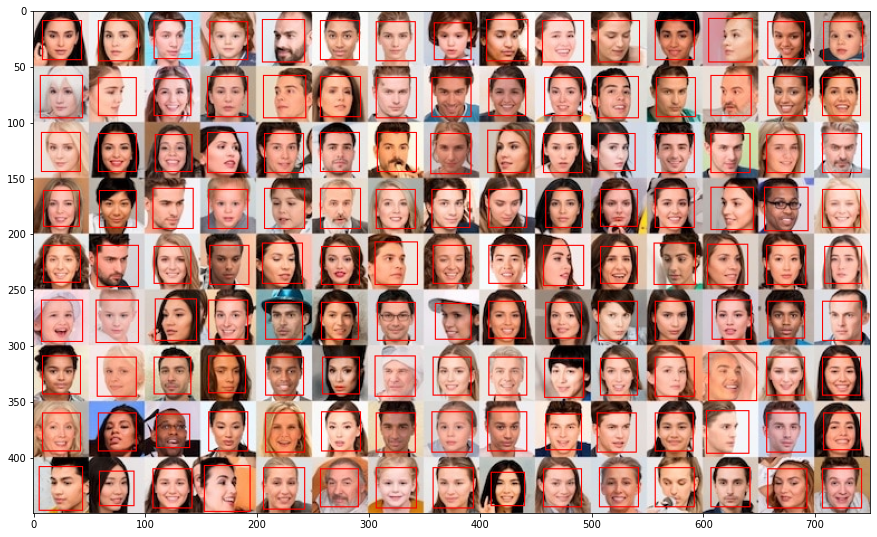

In [45]:
img = cv2.imread('faces.jpg')
gray = cv2.imread('faces.jpg',0)
cascade =  cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 5, minSize=(20,20), maxSize=(45,45))

for face in faces:
    x, y, w, h = face
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 1)
print(len(faces))
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1]);

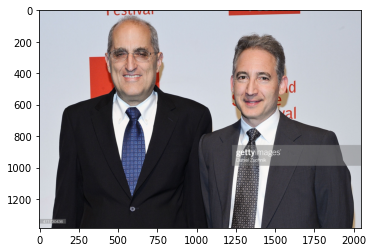

In [46]:
img = cv2.imread('Files/image.jpg')
plt.imshow(img[:,:,::-1]);

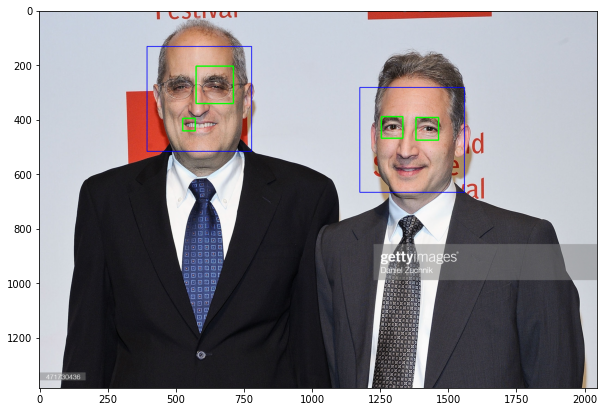

In [62]:
img = cv2.imread('Files/image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = classifier.detectMultiScale(gray, scaleFactor = 2, minNeighbors = 6, minSize=(50,50))
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

for face in faces:
    x, y, w, h = face 
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face_roi = gray[y:y+h, x:x+w]
    eyes = eyeCascade.detectMultiScale(face_roi, scaleFactor=1.01, minNeighbors=5, minSize=(40,40))

    for eye in eyes:
        x2, y2, w2, h2 = eye 
        cv2.rectangle(img, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (0, 255, 0), 3)



plt.figure(figsize=(10, 10))
plt.imshow(img[:,:,::-1]);


